<a href="https://colab.research.google.com/github/verkalacheva/pyad-2024/blob/lab2/%D0%9A%D0%B0%D0%BB%D0%B0%D1%87%D0%B5%D0%B2%D0%B0_PY%D0%90%D0%94_%D0%9B%D0%A02_Make_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Данные

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с книгами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [1]:
import pandas as pd

In [2]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 27.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:02<00:00, 30.3MB/s]


Посмотрим на таблицу `Ratings`.

In [3]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [5]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


Как распределяются рейтинги?

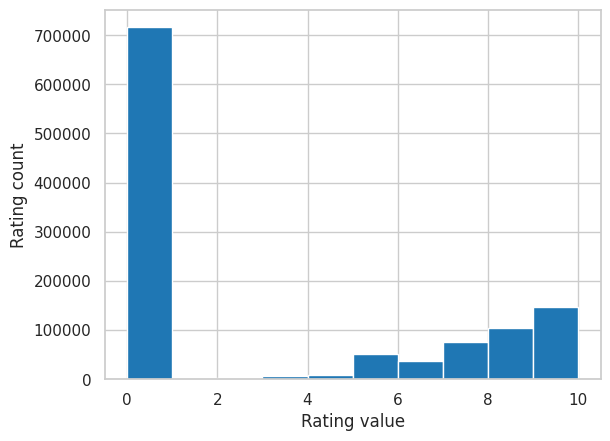

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


Теперь посмотрим на таблицу `Books`.

In [7]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-7-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- Есть немножко пропусков.
- Проверим уязвимую часть данных – года – на адекватность.

In [9]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2011,1
2038,1
1938,1
1906,1
1919,1
1926,1
1926,1
2008,1


Есть года, которые еще не наступили...

Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

In [10]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием. Надо проверить.

В сводке написано, что часть авторов и издателей провущена. Проверим, так ли это.

In [11]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Да, это так. Основные проблемы с данными выявили. Пора их исправлять и приступать к созданию рекомендаций.

## План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**

## Обработка данных

В паре строк в таблице Books.scv значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.

In [12]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]['Book-Title'][209538]

'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\\";Michael Teitelbaum"'

In [13]:
for i in books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]['Book-Title'].index:
  stroka = books.iloc[i]
  joined_cell = stroka['Book-Title']
  book_author = joined_cell[joined_cell.find(';')+1:-1]
  book_title = joined_cell[:joined_cell.find("\\")]
  year = stroka['Book-Author']
  col_names = list(books)
  for col_ind in range(len(col_names)):
    if col_names[col_ind] == 'ISBN':
      continue
    if col_names[col_ind] == 'Book-Title':
      books.loc[i, col_names[col_ind]] = book_title
    elif col_names[col_ind] =='Book-Author':
      books.loc[i, col_names[col_ind]] = book_author
    elif col_names[col_ind] == 'Year-Of-Publication':
      books.loc[i, col_names[col_ind]] = year
    else:
      books.loc[i, col_names[col_ind]] = books.iloc[i][col_names[col_ind-1]]



In [14]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [15]:
books = books[books['Year-Of-Publication']<=2024]

В нескольких строках в таблице Books.scv есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.

In [16]:
col_names[:-3]

['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']

In [17]:
books = books[col_names[:-3]]

In [18]:
books = books.dropna()
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271344 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271344 non-null  object
 1   Book-Title           271344 non-null  object
 2   Book-Author          271344 non-null  object
 3   Year-Of-Publication  271344 non-null  int64 
 4   Publisher            271344 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.4+ MB


Не будем использовать для обучения записи с рейтинг равным 0 из таблицы Ratings.scv. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.

In [19]:
ratings_not_zero = ratings[ratings['Book-Rating']!=0]

In [20]:
ratings_not_zero

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276736,3257224281,8
7,276737,0600570967,6
...,...,...,...
1149773,276704,0806917695,5
1149775,276704,1563526298,9
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).

In [21]:
ISBN_count_ratings = ratings_not_zero['ISBN'].value_counts().reset_index()
ISBN_drop = list(ISBN_count_ratings[ISBN_count_ratings['count']==1]['ISBN'])


In [22]:
len(ISBN_drop)

129621

In [23]:
User_ID_count_ratings = ratings_not_zero['User-ID'].value_counts().reset_index()
User_ID_drop = list(User_ID_count_ratings[User_ID_count_ratings['count']==1]['User-ID'])


In [24]:
len(User_ID_drop)

45382

In [25]:
ratings_train = ratings_not_zero[~ratings_not_zero['User-ID'].isin(User_ID_drop)]
ratings_train = ratings_train[~ratings_train['ISBN'].isin(ISBN_drop)]

In [26]:
ratings_train

,User-ID,ISBN,Book-Rating
16,276747,0060517794,9
19,276747,0671537458,9
20,276747,0679776818,8
33,276762,0380711524,5
44,276762,3453092007,8
...,...,...,...
1149745,276688,0892966548,10
1149746,276688,1551669315,6
1149761,276704,0345386108,6
1149771,276704,0743211383,7


In [27]:
books_train = books[~books['ISBN'].isin(ISBN_drop)]

## Обучениение SVD

Обучить SVD на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
МАЕ должно быть ниже 1.3 (для этого есть тест)
Сохранить модель

In [28]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505163 sha256=7032096d0de12942d793297792e0d26c449512a61b03be47d4401b973c46a5ca
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [29]:
import pandas as pd
import pickle
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise import accuracy


reader = Reader(rating_scale=(1, 10))

data = Dataset.load_from_df(ratings_train, reader)

trainset, testset = train_test_split(data, test_size=0.2)

param_grid = {
'n_factors': [ 30, 40],
'n_epochs': [20, 30],
'lr_all': [0.0025, 0.005],
'reg_all': [0.01, 0.02]
}
gs = GridSearchCV(SVD, param_grid, measures=['mae'], cv=3)
gs.fit(data)

print(f"Лучшие параметры: {gs.best_params['mae']}")
print(f"Лучший MAE: {gs.best_score['mae']}")

svd = gs.best_estimator['mae']
svd.fit(trainset)

predictions = svd.test(testset)
mae = accuracy.mae(predictions)

print(f'MAE: {mae}')

with open("svd.pkl", "wb") as file:
    pickle.dump(svd, file)




Лучшие параметры: {'n_factors': 30, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.02}
Лучший MAE: 1.2499119802729393
MAE:  1.2386
MAE: 1.2385981354364026


##Обучение SGDRegressor

In [30]:
def title_preprocessing(text: str) -> str:
    """Функция для нормализации текстовых данных в стобце Book-Title:
    - токенизация
    - удаление стоп-слов
    - удаление пунктуации
    Опционально можно убрать шаги или добавить дополнительные.
    """
    stop_words = set(stopwords.words("english"))
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if (word.isalpha() or word.isdigit()) and word not in stop_words]

    return " ".join(tokens)

In [31]:
import pickle
import re
import nltk
import pandas as pd
import sklearn

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')


avg_ratings = ratings_train.groupby('ISBN')['Book-Rating'].mean().reset_index()
avg_ratings.rename(columns={'Book-Rating': 'Avg-Rating'}, inplace=True)

ratings_train_lin_reg = ratings_train.merge(avg_ratings, on='ISBN', how='left')


ratings_train_lin_reg.drop(columns=['Book-Rating', 'User-ID'], inplace=True)
ratings_train_lin_reg = ratings_train_lin_reg.drop_duplicates(subset=None, keep='first', inplace=False)


books_train.loc[:, 'Book-Title'] = books_train['Book-Title'].apply(title_preprocessing)
books_with_ratings = pd.merge(books_train, ratings_train_lin_reg, on='ISBN', how='left')
books_with_ratings = books_with_ratings.dropna()

lab_enc_author = LabelEncoder()
lab_enc_publisher = LabelEncoder()
books_with_ratings.loc[:, 'Book-Author'] = lab_enc_author.fit_transform(books_with_ratings['Book-Author'])
books_with_ratings.loc[:, 'Publisher'] = lab_enc_publisher.fit_transform(books_with_ratings['Publisher'])

# books_with_ratings = books_with_ratings.drop(columns=['ISBN'])

vectorizer = TfidfVectorizer(max_features=1000)
X_title = vectorizer.fit_transform(books_with_ratings['Book-Title'])

X_other = books_with_ratings.drop(columns=['Book-Title', 'Avg-Rating'])
X_with_ISBN = pd.concat([pd.DataFrame(X_title.toarray()), X_other.reset_index(drop=True)], axis=1)
X = X_with_ISBN.drop(columns=['ISBN'])

X.columns = X.columns.astype(str)
y = books_with_ratings['Avg-Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
numerical_columns = ['Year-Of-Publication', 'Book-Author', 'Publisher']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
print(X_train)

linreg = SGDRegressor(max_iter=1000, tol=1e-3, alpha=0.001, random_state=42)
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

with open("linreg.pkl", "wb") as file:
    pickle.dump(linreg, file)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


         0    1    2    3    4    5    6    7    8    9  ...  993  994  995  \
21028  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
13150  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
48820  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
48520  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
38882  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
11284  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
44732  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
38158  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
860    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
15795  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       996  997  998  999  Book-Author  Year-Of-Pub

## Персональная рекомендация

 Алгоритм такой:
Находим нужного пользователя.
Делаем предсказание SVD для книг, которым он "поставил" 0.
Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
Делаем предсказание LinReg для этих же книг.
Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
В конце файла комментарием записываем полученную рекомендацию.
То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

In [32]:
rating_zero = ratings[ratings['Book-Rating']==0]
rating_zero_count = rating_zero.groupby('User-ID')['Book-Rating'].count()
rating_zero_count.sort_values(ascending=False)

,Book-Rating
User-ID,
198711,7533
11676,5078
35859,5021
212898,4782
278418,4416
...,...
120942,1
120947,1
120956,1


User-ID	198711

In [33]:
ratings_198711= ratings[ratings['User-ID'] == 198711]
ratings_198711_zero_rat = ratings_198711[ratings_198711['Book-Rating'] == 0]
ratings_198711_zero_rat

,User-ID,ISBN,Book-Rating
816071,198711,000123207X,0
816072,198711,0001232088,0
816073,198711,0001931377,0
816074,198711,000225218X,0
816075,198711,0003293459,0
...,...,...,...
823616,198711,8511839102,0
823617,198711,9307166813,0
823618,198711,9590624067,0
823619,198711,9631172937,0


In [34]:
predictions_personal_svd = []
user_id = 198711
for item in ratings_198711_zero_rat['ISBN']:
    pred = svd.predict(user_id, item)
    if pred.est >=8:
      predictions_personal_svd.append(item)

print(predictions_personal_svd)


['0060915544', '0064400018', '0064400042', '0064400557', '0064401847', '0064405052', '0064409422', '0064471101', '0307010368', '0345339681', '0345361792', '0380698714', '039480029X', '0394820371', '0425083837', '0425105334', '0439064872', '0440211727', '0440219078', '0440223202', '0440235502', '0440406498', '0440498058', '0440967694', '0440998050', '0451163966', '0451170113', '0451628047', '0515122734', '0515136530', '055321246X', '0553272535', '059035342X', '0590464639', '0671032658', '0671617028', '067168390X', '0679430946', '0689818769', '0694003611', '0743400526', '0743454146', '0836218353', '0836220854', '0920668372']


In [36]:
name_books_svd_predict = list(books[books['ISBN'].isin(predictions_personal_svd)]['Book-Title'])
name_books_svd_predict

['October Sky: A Memoir',
 'The Bean Trees',
 "The Magician's Nephew (Narnia)",
 'The Giver (21st Century Reference)',
 'A Time to Kill',
 'The Phantom Tollbooth',
 'Lonesome Dove',
 'A Prayer for Owen Meany',
 'The Green Mile',
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'The Color Purple',
 'The Hobbit : The Enchanting Prelude to The Lord of the Rings',
 'Harry Potter and the Chamber of Secrets (Book 2)',
 'Night',
 "Charlotte's Web (Trophy Newbery)",
 'Yukon Ho!',
 'Love You Forever',
 'The Outsiders',
 'She Said Yes : The Unlikely Martyrdom of Cassie Bernall',
 'The Footprints of God : A Novel',
 'A Wrinkle in Time',
 'The Hunt for Red October',
 'Inferno (Mentor)',
 'Walden and Other Writings',
 "One Flew Over the Cuckoo's Nest",
 'The Talisman',
 'Little House in the Big Woods',
 'Sideways Stories from Wayside School (Wayside School)',
 'Evening Class',
 'Bridge to Terabithia',
 'The Hot Zone',
 'Key of Valor (Roberts, Nora. Key Trilogy, 3.)',
 'A Wrinkl

In [37]:
X_with_ISBN_personal = X_with_ISBN[X_with_ISBN['ISBN'].isin(predictions_personal_svd)]
X_personal = X_with_ISBN_personal.drop(columns=['ISBN'])

X_personal.columns = X_personal.columns.astype(str)


numerical_columns = ['Year-Of-Publication', 'Book-Author', 'Publisher']

X_personal[numerical_columns] = scaler.transform(X_personal[numerical_columns])
print(X_personal)

linreg_personal_predict = linreg.predict(X_personal)

         0    1    2    3    4    5    6    7    8    9  ...  993  994  995  \
219    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
352    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
634    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
643    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
666    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
708    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
906    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
954    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1068   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1471   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1715   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2235   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [38]:
linreg_personal_predict

array([7.56978359, 7.54669366, 7.55065062, 7.6091993 , 7.6745295 ,
       7.53694697, 7.5664071 , 7.56708963, 7.69020106, 7.73482705,
       7.58518693, 7.82170865, 7.75152336, 7.48671462, 7.59330566,
       7.55165902, 7.48723286, 7.57996328, 7.5730515 , 7.70843224,
       7.64837759, 7.62228178, 7.5526806 , 7.52116214, 7.6415356 ,
       7.58432693, 7.6582147 , 7.64303995, 7.49630432, 7.59381054,
       7.5765413 , 7.66969202, 7.64707766, 7.57599359, 7.5092071 ,
       7.55013394, 7.61012749, 7.84186933, 7.72674935, 7.64994385,
       7.65893431, 7.62836759, 7.62532881, 7.55145634, 7.52028393])

In [39]:
predictions_personal = {
       'ISBN': list(X_with_ISBN_personal['ISBN']),
       'rating_predict': linreg_personal_predict,
   }

predictions_personal_df = pd.DataFrame(predictions_personal)

predictions_personal_df = predictions_personal_df.merge(books[['ISBN', 'Book-Title']], on='ISBN', how='left')
predictions_personal_df.sort_values(by='rating_predict', ascending = False).reset_index(drop=True)

,ISBN,rating_predict,Book-Title
0,0694003611,7.841869,Goodnight Moon Board Book
1,0345339681,7.821709,The Hobbit : The Enchanting Prelude to The Lor...
2,0439064872,7.751523,Harry Potter and the Chamber of Secrets (Book 2)
3,059035342X,7.734827,Harry Potter and the Sorcerer's Stone (Harry P...
4,0440406498,7.726749,The Black Cauldron (Chronicles of Prydain (Pap...
5,0743454146,7.708432,The Footprints of God : A Novel
6,0671032658,7.690201,The Green Mile
7,0440211727,7.674529,A Time to Kill
8,0515136530,7.669692,"Key of Valor (Roberts, Nora. Key Trilogy, 3.)"
9,0064400042,7.658934,On the Banks of Plum Creek
